# Líneas en espacio de Hough

Primero importamos las librerías

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Abrimos la imagen, la convertimos a gris y obtenemos sus bordes

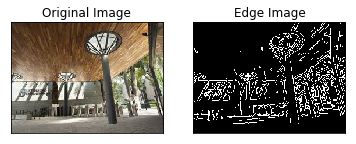

In [65]:
img = cv2.imread('entrada.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,180,250,apertureSize = 3)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Ahora, calcularemos las líneas que forman la imagen.
En la transformada de Hough de OpenCV, _HoughLines_ requiere los siguientes parámetros:<br>
  -La imagen de entrada<br>
  -La discretización en d<br>
  -La discretización en $\rho$<br>
  -Cuántos votos son requeridos para que se considere una línea<br><br>
  
  La función regresará un conjunto de valores $d$,$\rho$


In [95]:
pi = np.pi
lines = cv2.HoughLines(edges,1,pi/180,100)

Aquí veremos cuántas lineas nos regresó y cuáles son sus coordenadas.

In [96]:
print(len(lines))
print(lines)

4
[[[ 102.            1.57079637]]

 [[ 104.            1.57079637]]

 [[ 165.            1.55334306]]

 [[-156.            3.00196624]]]


Que si las mostramos sobre nuestra imagen original:

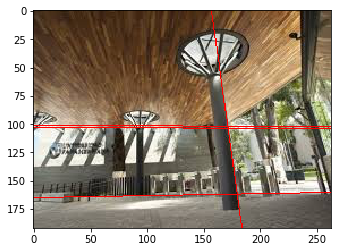

In [97]:
img = cv2.imread('entrada.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)

cv2.imwrite('houghlines.jpg',img)
plt.imshow(img)
plt.show()

Como se puede dar cuenta, las lineas son infinitas. 
Si quisiéramos saber dónde empieza y dónde acaba una línea, tendríamos que calcular dónde se cruzan nuestras líneas. Esto sería muy tardado, por lo que se propone una mejora
al algoritmo, en donde sólo se analiza un subconjunto de los puntos de orilla calculado estadísticamente, para obtener los cruces.<br>
La función _HoughLinesP_ necesita dos argumentos extra:
<br>minLineLength para determinar el tamaño mínimo de la linea
<br>maxLineGap para determinar si dos lineas son la misma de acuerdo a su cercanía.

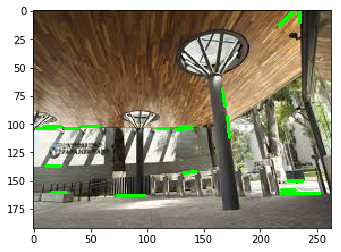

In [106]:
img = cv2.imread('entrada.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,70,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines2.jpg',img)
plt.imshow(img)
plt.show()

__Ejercicio:__ Encuentra una buena colección de líneas para las siguientes imagenes. Muestra sus patrones de orilla y las líneas calculadas.
        
        

![art](./art1.jpg)
![sudoku](./sudoku.jpg)

__Tarea:__ Detectar líneas en tiempo real utilizando el feedback de la cámara. 